In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = '/Users/victoriavu25/btt_data/prepped_business.json'

df = pd.read_json(file_path)  # Assuming each line is a separate JSON object
print(df.info())  # Get information about the DataFrame (e.g., column types)
df.head()  # Display the first few rows of the DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 5900 entries, 3 to 150336
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   business_id                      5900 non-null   object 
 1   name                             5900 non-null   object 
 2   address                          5900 non-null   object 
 3   city                             5900 non-null   object 
 4   state                            5900 non-null   object 
 5   stars                            5900 non-null   float64
 6   review_count                     5900 non-null   int64  
 7   is_open                          5900 non-null   int64  
 8   categories                       5900 non-null   object 
 9   RestaurantsPriceRange2           5900 non-null   int64  
 10  NoiseLevel                       5900 non-null   int64  
 11  RestaurantsDelivery_True         5900 non-null   int64  
 12  OutdoorSeating_True    

,business_id,name,address,city,state,stars,review_count,is_open,categories,RestaurantsPriceRange2,...,Friday_night,Saturday_morning,Saturday_midday,Saturday_night,Sunday_morning,Sunday_midday,Sunday_night,WiFi_encoded,RestaurantsAttire_encoded,district_encoded
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",1,...,1,1,0,1,1,0,1,0,0,0
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,4.0,245,1,"Sushi Bars, Restaurants, Japanese",2,...,1,0,1,1,0,1,1,0,0,0
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,4.5,205,1,"Korean, Restaurants",1,...,1,1,0,1,0,0,0,1,0,0
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,4.0,65,0,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",2,...,0,1,0,0,1,0,0,0,0,0
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,3.0,41,0,"Pizza, Restaurants, Salad, Soup",1,...,0,0,1,0,0,1,1,1,0,5


In [4]:
pd.set_option('display.max_rows', 100)
print(df.describe())
print(df.columns)
print(df.shape)

             stars  review_count      is_open  RestaurantsPriceRange2  \
count  5900.000000   5900.000000  5900.000000             5900.000000   
mean      3.529746    116.857797     0.588475                1.624407   
std       0.799223    242.261150     0.492152                0.615074   
min       1.000000      5.000000     0.000000                1.000000   
25%       3.000000     15.000000     0.000000                1.000000   
50%       3.500000     42.000000     1.000000                2.000000   
75%       4.000000    119.000000     1.000000                2.000000   
max       5.000000   5721.000000     1.000000                4.000000   

        NoiseLevel  RestaurantsDelivery_True  OutdoorSeating_True  \
count  5900.000000               5900.000000          5900.000000   
mean      0.969322                  0.553729             0.307288   
std       0.521035                  0.497147             0.461409   
min       0.000000                  0.000000             0.000000 

In [5]:
df.head()

,business_id,name,address,city,state,stars,review_count,is_open,categories,RestaurantsPriceRange2,...,Friday_night,Saturday_morning,Saturday_midday,Saturday_night,Sunday_morning,Sunday_midday,Sunday_night,WiFi_encoded,RestaurantsAttire_encoded,district_encoded
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",1,...,1,1,0,1,1,0,1,0,0,0
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,4.0,245,1,"Sushi Bars, Restaurants, Japanese",2,...,1,0,1,1,0,1,1,0,0,0
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,4.5,205,1,"Korean, Restaurants",1,...,1,1,0,1,0,0,0,1,0,0
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,4.0,65,0,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",2,...,0,1,0,0,1,0,0,0,0,0
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,3.0,41,0,"Pizza, Restaurants, Salad, Soup",1,...,0,0,1,0,0,1,1,1,0,5


In [6]:
df = df.drop(columns = ["is_open", "categories", "name", "address", "state", 'city'])

In [7]:
pd.set_option('display.max_rows', 100)
print(df.dtypes)

business_id                         object
stars                              float64
review_count                         int64
RestaurantsPriceRange2               int64
NoiseLevel                           int64
RestaurantsDelivery_True             int64
OutdoorSeating_True                  int64
BusinessAcceptsCreditCards_True      int64
BikeParking_True                     int64
RestaurantsTakeOut_True              int64
Caters_True                          int64
RestaurantsReservations_True         int64
RestaurantsGoodForGroups_True        int64
HasTV_True                           int64
GoodForKids_True                     int64
Ambience_touristy_True               int64
Ambience_hipster_True                int64
Ambience_romantic_True               int64
Ambience_divey_True                  int64
Ambience_intimate_True               int64
Ambience_trendy_True                 int64
Ambience_upscale_True                int64
Ambience_classy_True                 int64
Ambience_ca

## key: 
'WiFi': 0 = no, 1 = paid, 2 = free \
'RestaurantsAttire': 0 = casual, 1 = dressy, 2 = formal \
'NoiseLevel': 0 = quiet, 1 = average, 2 = loud, 3 = very loud \
Label Encoding for 'district': 
{
    0: 'Central', 1: 'Central Northeast', 2: 'Lower Far Northeast', 3: 'Lower North', 
    4: 'Lower Northeast', 5: 'Lower Northwest', 6: 'Lower South', 7: 'Lower Southwest', 
    8: 'North', 9: 'North Delaware', 10: 'River Wards', 11: 'South', 
    12: 'University Southwest', 13: 'Upper Far Northeast', 14: 'Upper North', 
    15: 'Upper Northwest', 16: 'West', 17: 'West Park'
}

everything else: 1 = true, 0 = false


In [9]:
df_filtered = df.drop(columns = 'business_id')

In [10]:
# Grouping by 'stars' to compute mean and count
summary_df = df_filtered.groupby('district_encoded').agg(['mean', 'size']).reset_index()

# Renaming columns: flatten multi-index columns
summary_df.columns = [
    f"{col[0]}_{col[1]}" if col[1] else col[0] for col in summary_df.columns
]

# Rename 'size' to 'count' explicitly
summary_df.rename(columns={'size_size': 'count'}, inplace=True)

# Display the resulting summary DataFrame
summary_df


,district_encoded,stars_mean,stars_size,review_count_mean,review_count_size,RestaurantsPriceRange2_mean,RestaurantsPriceRange2_size,NoiseLevel_mean,NoiseLevel_size,RestaurantsDelivery_True_mean,...,Sunday_morning_mean,Sunday_morning_size,Sunday_midday_mean,Sunday_midday_size,Sunday_night_mean,Sunday_night_size,WiFi_encoded_mean,WiFi_encoded_size,RestaurantsAttire_encoded_mean,RestaurantsAttire_encoded_size
0,0,3.633534,2490,176.576305,2490,1.763052,2490,0.974297,2490,0.518072,...,0.455020,2490,0.229719,2490,0.460241,2490,0.620884,2490,0.038554,2490
1,1,3.355263,152,40.625000,152,1.598684,152,0.986842,152,0.631579,...,0.460526,152,0.243421,152,0.460526,152,0.802632,152,0.006579,152
2,2,3.137681,138,50.601449,138,1.565217,138,0.992754,138,0.623188,...,0.615942,138,0.173913,138,0.594203,138,0.681159,138,0.000000,138
3,3,3.629771,262,72.301527,262,1.442748,262,0.965649,262,0.599237,...,0.412214,262,0.259542,262,0.370229,262,0.641221,262,0.000000,262
4,4,3.029412,102,31.696078,102,1.421569,102,0.872549,102,0.637255,...,0.539216,102,0.137255,102,0.460784,102,0.813725,102,0.019608,102
5,5,3.563197,269,99.836431,269,1.576208,269,0.895911,269,0.535316,...,0.550186,269,0.271375,269,0.505576,269,0.639405,269,0.007435,269
6,6,3.464286,42,70.214286,42,1.833333,42,1.357143,42,0.476190,...,0.238095,42,0.095238,42,0.119048,42,0.642857,42,0.000000,42
7,7,2.798077,104,54.009615,104,1.519231,104,1.115385,104,0.413462,...,0.625000,104,0.000000,104,0.423077,104,0.663462,104,0.019231,104
8,8,3.144144,111,34.549550,111,1.405405,111,1.027027,111,0.711712,...,0.405405,111,0.162162,111,0.342342,111,0.783784,111,0.018018,111
9,9,3.334395,157,44.184713,157,1.484076,157,1.000000,157,0.662420,...,0.522293,157,0.242038,157,0.464968,157,0.770701,157,0.006369,157


In [11]:
# Grouping by 'stars' to compute mean and count
summary_df = df_filtered.groupby('stars').agg(['mean', 'size']).reset_index()

# Renaming columns: flatten multi-index columns
summary_df.columns = [
    f"{col[0]}_{col[1]}" if col[1] else col[0] for col in summary_df.columns
]

# Rename 'size' to 'count' explicitly
summary_df.rename(columns={'size_size': 'count'}, inplace=True)

# Display the resulting summary DataFrame
summary_df


,stars,review_count_mean,review_count_size,RestaurantsPriceRange2_mean,RestaurantsPriceRange2_size,NoiseLevel_mean,NoiseLevel_size,RestaurantsDelivery_True_mean,RestaurantsDelivery_True_size,OutdoorSeating_True_mean,...,Sunday_midday_mean,Sunday_midday_size,Sunday_night_mean,Sunday_night_size,WiFi_encoded_mean,WiFi_encoded_size,RestaurantsAttire_encoded_mean,RestaurantsAttire_encoded_size,district_encoded_mean,district_encoded_size
0,1.0,13.576923,26,1.153846,26,1.230769,26,0.692308,26,0.076923,...,0.038462,26,0.307692,26,0.538462,26,0.000000,26,9.269231,26
1,1.5,21.088000,125,1.256000,125,1.168000,125,0.752000,125,0.072000,...,0.040000,125,0.304000,125,0.680000,125,0.000000,125,8.104000,125
2,2.0,27.993631,314,1.442675,314,1.089172,314,0.652866,314,0.156051,...,0.098726,314,0.401274,314,0.719745,314,0.015924,314,6.926752,314
3,2.5,52.570632,538,1.594796,538,1.063197,538,0.570632,538,0.191450,...,0.171004,538,0.498141,538,0.736059,538,0.022305,538,6.665428,538
4,3.0,67.275313,879,1.616610,879,0.989761,879,0.577929,879,0.294653,...,0.191126,879,0.418658,879,0.716724,879,0.020478,879,5.327645,879
5,3.5,118.518055,1357,1.683125,1357,0.952837,1357,0.554901,1357,0.342668,...,0.252027,1357,0.492262,1357,0.652174,1357,0.029477,1357,4.717760,1357
6,4.0,181.320051,1581,1.683744,1581,0.942441,1581,0.535104,1581,0.365591,...,0.268817,1581,0.490196,1581,0.629349,1581,0.021505,1581,4.629349,1581
7,4.5,146.344645,943,1.611877,943,0.908802,943,0.516437,943,0.342524,...,0.182397,943,0.427359,943,0.621421,943,0.018028,943,5.788971,943
8,5.0,34.781022,137,1.452555,137,0.854015,137,0.357664,137,0.182482,...,0.094891,137,0.204380,137,0.817518,137,0.014599,137,6.934307,137


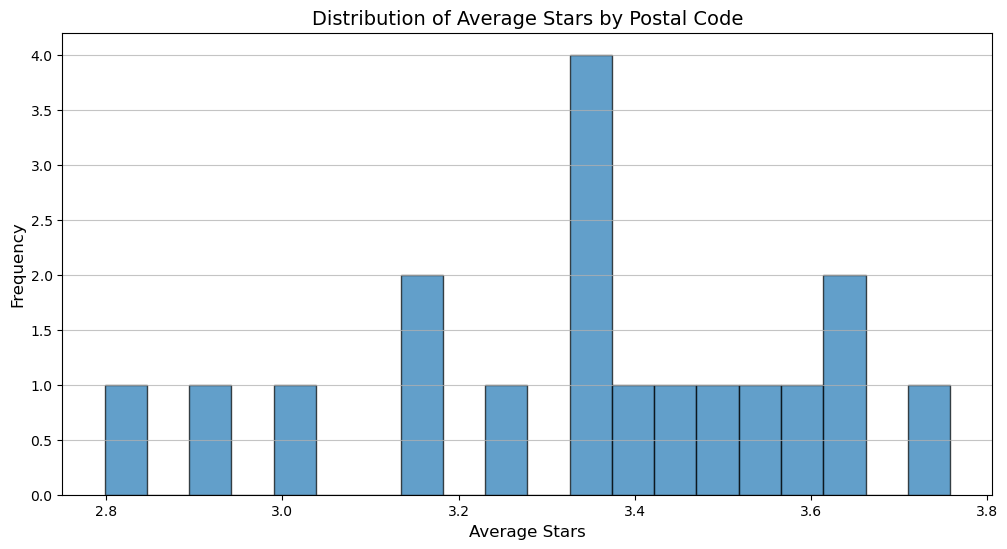

In [12]:
import matplotlib.pyplot as plt

# Check if 'stars' and 'postal_code' columns exist in the dataset
if 'stars' in df.columns and 'district_encoded' in df.columns:
    # Group by postal code and calculate the average star rating
    postal_code_stars = df.groupby('district_encoded')['stars'].mean()

    # Plot the histogram
    plt.figure(figsize=(12, 6))
    plt.hist(postal_code_stars, bins=20, edgecolor='k', alpha=0.7)
    plt.title('Distribution of Average Stars by Postal Code', fontsize=14)
    plt.xlabel('Average Stars', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    missing_columns = {'stars', 'postal_code'} - set(df.columns)
    print(f"The following columns are missing from the dataset: {missing_columns}")


Groupby stars and postal_code in order to provide more specific advice to businesses for our proposal later on. For example, we want to be able to use the columns from bestnight to see which hours are the best for the 5 star businesses to reccomend a change in hours to attract more customers. this is a free way to improve their business. might be weak because some groups only have 1 in it lol

In [14]:
# Grouping by 'stars' and 'postal_code' to get the mean and count for all columns in the dataframe
summary_df = df_filtered.groupby(['stars','district_encoded']).agg(['mean', 'size']).reset_index()

# Renaming the 'size' aggregation to 'count'
summary_df.columns = ['_'.join(col).strip('_') if col[1] != '' else col[0] for col in summary_df.columns]
summary_df = summary_df.rename(columns={'size': 'count'})

pd.set_option('display.max_rows', 154)
summary_df

,stars,district_encoded,review_count_mean,review_count_size,RestaurantsPriceRange2_mean,RestaurantsPriceRange2_size,NoiseLevel_mean,NoiseLevel_size,RestaurantsDelivery_True_mean,RestaurantsDelivery_True_size,...,Sunday_morning_mean,Sunday_morning_size,Sunday_midday_mean,Sunday_midday_size,Sunday_night_mean,Sunday_night_size,WiFi_encoded_mean,WiFi_encoded_size,RestaurantsAttire_encoded_mean,RestaurantsAttire_encoded_size
0,1.0,3,23.666667,3,1.000000,3,1.333333,3,1.000000,3,...,1.000000,3,0.000000,3,0.333333,3,0.333333,3,0.000000,3
1,1.0,4,10.666667,3,1.000000,3,1.666667,3,0.666667,3,...,1.000000,3,0.000000,3,0.333333,3,0.666667,3,0.000000,3
2,1.0,7,8.000000,1,1.000000,1,1.000000,1,0.000000,1,...,0.000000,1,0.000000,1,0.000000,1,0.000000,1,0.000000,1
3,1.0,8,8.200000,5,1.000000,5,1.000000,5,0.800000,5,...,1.000000,5,0.000000,5,0.400000,5,0.400000,5,0.000000,5
4,1.0,9,5.000000,1,4.000000,1,1.000000,1,0.000000,1,...,0.000000,1,0.000000,1,0.000000,1,1.000000,1,0.000000,1
5,1.0,10,16.333333,3,1.000000,3,1.333333,3,0.666667,3,...,0.666667,3,0.000000,3,0.000000,3,0.333333,3,0.000000,3
6,1.0,11,10.000000,3,1.333333,3,1.000000,3,0.333333,3,...,0.666667,3,0.333333,3,0.666667,3,1.000000,3,0.000000,3
7,1.0,12,7.000000,1,1.000000,1,1.000000,1,1.000000,1,...,1.000000,1,0.000000,1,1.000000,1,1.000000,1,0.000000,1
8,1.0,13,5.000000,1,1.000000,1,1.000000,1,1.000000,1,...,1.000000,1,0.000000,1,0.000000,1,0.000000,1,0.000000,1
9,1.0,14,5.000000,1,1.000000,1,1.000000,1,0.000000,1,...,0.000000,1,0.000000,1,0.000000,1,1.000000,1,0.000000,1


In [15]:
# Exclude specific columns and calculate correlation with 'stars'
columns_to_exclude = ['review_count','RestaurantsPriceRange2', 'WiFi_encoded', 'district_encoded', 'RestaurantsAttire_encoded']
columns_to_include = [col for col in df_filtered.columns if col not in columns_to_exclude]

# Compute correlations
correlation_with_stars = df_filtered[columns_to_include].corr()['stars'].sort_values(ascending=False)
correlation_with_stars


stars                              1.000000
Parking_street_True                0.313874
BikeParking_True                   0.191675
Thursday_midday                    0.166145
Friday_midday                      0.166018
Saturday_midday                    0.152287
Wednesday_midday                   0.151055
Friday_night                       0.148854
Ambience_casual_True               0.138164
Ambience_classy_True               0.136562
Saturday_night                     0.134424
Tuesday_midday                     0.128325
OutdoorSeating_True                0.122541
Thursday_night                     0.114537
Caters_True                        0.104554
Ambience_intimate_True             0.101805
Ambience_trendy_True               0.101792
Wednesday_night                    0.094751
Ambience_hipster_True              0.084662
RestaurantsReservations_True       0.078820
Sunday_midday                      0.068452
Ambience_romantic_True             0.061562
Tuesday_night                   

In [16]:
# Calculate the correlation matrix, focusing on the 'stars' column
# Drop specified columns from the DataFrame to exclude them from the correlation calculation
columns_to_exclude = ['review_count','RestaurantsPriceRange2', 'WiFi_encoded', 'district_encoded', 'RestaurantsAttire_encoded']
correlation_matrix = df_filtered.drop(columns=columns_to_exclude).corr()
correlation_matrix

,stars,NoiseLevel,RestaurantsDelivery_True,OutdoorSeating_True,BusinessAcceptsCreditCards_True,BikeParking_True,RestaurantsTakeOut_True,Caters_True,RestaurantsReservations_True,RestaurantsGoodForGroups_True,...,Thursday_night,Friday_morning,Friday_midday,Friday_night,Saturday_morning,Saturday_midday,Saturday_night,Sunday_morning,Sunday_midday,Sunday_night
stars,1.000000,-0.115863,-0.091806,0.122541,-0.118726,0.191675,0.012279,0.104554,0.078820,-0.009005,...,0.114537,-0.065521,0.166018,0.148854,-0.076490,0.152287,0.134424,-0.087633,0.068452,0.006697
NoiseLevel,-0.115863,1.000000,-0.055480,0.020180,-0.007078,-0.001759,-0.073589,-0.098110,-0.032050,0.018646,...,-0.113023,-0.072024,0.045337,-0.111983,-0.046510,0.025054,-0.101874,-0.013612,-0.006915,-0.074954
RestaurantsDelivery_True,-0.091806,-0.055480,1.000000,0.012629,0.147950,0.098536,0.356622,0.264576,0.022514,0.095006,...,0.147075,0.179467,-0.026274,0.107775,0.173741,-0.004184,0.125645,0.111206,0.084626,0.191660
OutdoorSeating_True,0.122541,0.020180,0.012629,1.000000,0.068284,0.155164,0.104135,0.159152,0.227453,0.227798,...,0.024625,-0.073260,0.206716,0.020843,-0.046627,0.169320,0.027998,0.032799,0.084710,0.038256
BusinessAcceptsCreditCards_True,-0.118726,-0.007078,0.147950,0.068284,1.000000,0.080058,0.068369,0.134415,0.133397,0.119056,...,0.121473,0.063192,0.052716,0.094595,0.071307,0.061574,0.089403,0.076213,0.067757,0.112875
BikeParking_True,0.191675,-0.001759,0.098536,0.155164,0.080058,1.000000,0.104189,0.179507,0.027661,0.045617,...,0.134122,0.124526,0.110826,0.139554,0.112878,0.106157,0.136619,0.118817,0.088027,0.123093
RestaurantsTakeOut_True,0.012279,-0.073589,0.356622,0.104135,0.068369,0.104189,1.000000,0.240879,0.040808,0.199269,...,0.073244,0.111291,0.001629,0.050632,0.086618,0.012913,0.052654,0.063294,0.044369,0.101183
Caters_True,0.104554,-0.098110,0.264576,0.159152,0.134415,0.179507,0.240879,1.000000,0.158908,0.194137,...,0.169472,0.129063,0.043290,0.160230,0.091901,0.064096,0.153506,0.077396,0.078651,0.159589
RestaurantsReservations_True,0.078820,-0.032050,0.022514,0.227453,0.133397,0.027661,0.040808,0.158908,1.000000,0.389649,...,0.120665,-0.252261,0.369294,0.112798,-0.211194,0.357061,0.140744,-0.146677,0.270163,0.126500
RestaurantsGoodForGroups_True,-0.009005,0.018646,0.095006,0.227798,0.119056,0.045617,0.199269,0.194137,0.389649,1.000000,...,0.033277,-0.106110,0.186804,-0.003094,-0.098186,0.191715,0.021714,-0.071726,0.165800,0.087501


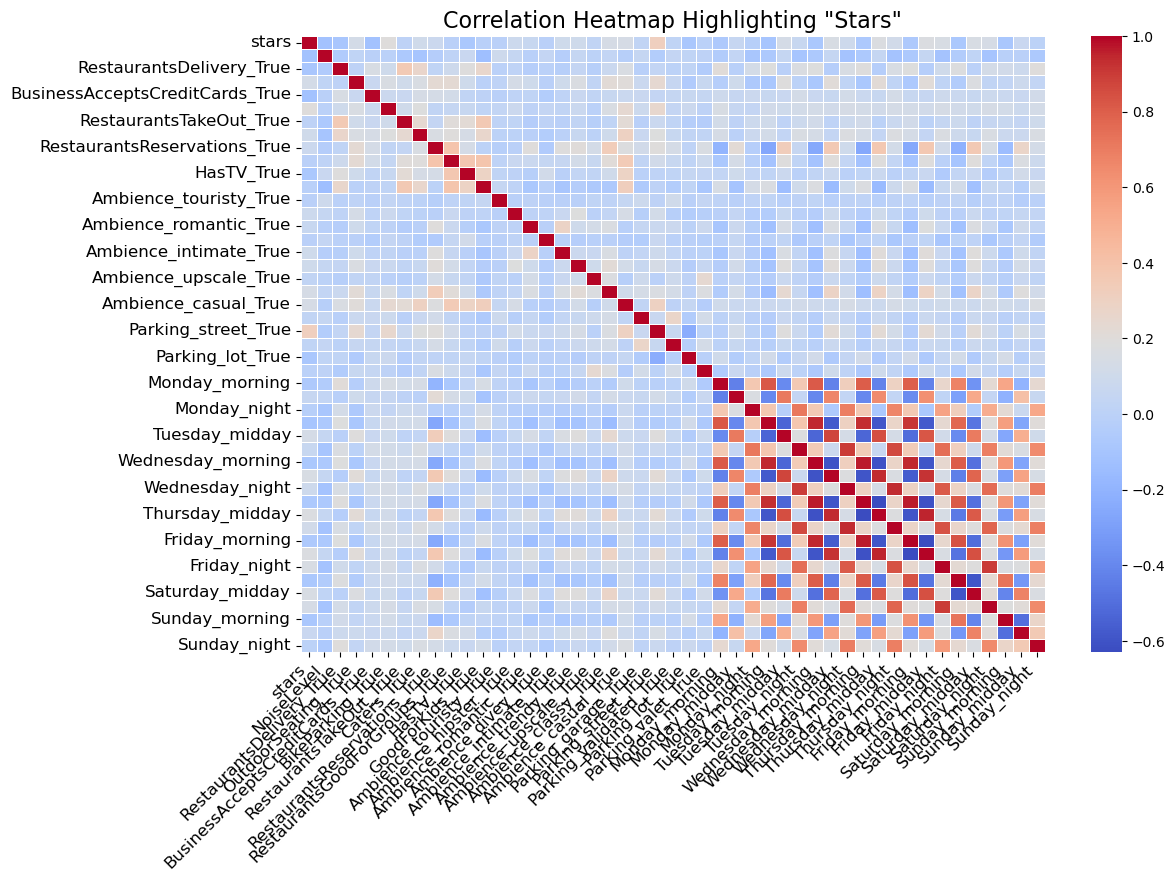

In [17]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Extract correlations related to 'stars' and ensure it's visible
correlation_with_stars = correlation_matrix[['stars']].sort_values(by='stars', ascending=False)

# Generate a heatmap focusing on the correlation of 'stars' with other variables
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Highlight 'stars' column by making its label bold and bigger
plt.title('Correlation Heatmap Highlighting "Stars"', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Display the heatmap
plt.show()


# ANOVA TEST

In [19]:
import scipy.stats as stats

# List of categorical columns to perform ANOVA on
categorical_columns = ['NoiseLevel', 'RestaurantsPriceRange2', 'WiFi_encoded', 'district_encoded', 'RestaurantsAttire_encoded']

# Perform ANOVA for each categorical column
anova_results = {}
for col in categorical_columns:
    anova_results[col] = stats.f_oneway(
        *[df[df[col] == cat]['stars'] for cat in df[col].unique()]
    )

anova_results


{'NoiseLevel': F_onewayResult(statistic=36.56772322850146, pvalue=2.085320001445128e-23),
 'RestaurantsPriceRange2': F_onewayResult(statistic=12.452942956387632, pvalue=4.085392840384453e-08),
 'WiFi_encoded': F_onewayResult(statistic=9.103460194373403, pvalue=0.00011285173965373763),
 'district_encoded': F_onewayResult(statistic=25.034167037609045, pvalue=7.61433912184162e-77),
 'RestaurantsAttire_encoded': F_onewayResult(statistic=1.0841010496499692, pvalue=0.33827307415426977)}

In [20]:
# Create a new column 'high_rating' based on the 'stars' column
df['is_rating_high'] = (df['stars'] >= 4).astype(int)
df

,business_id,stars,review_count,RestaurantsPriceRange2,NoiseLevel,RestaurantsDelivery_True,OutdoorSeating_True,BusinessAcceptsCreditCards_True,BikeParking_True,RestaurantsTakeOut_True,...,Saturday_morning,Saturday_midday,Saturday_night,Sunday_morning,Sunday_midday,Sunday_night,WiFi_encoded,RestaurantsAttire_encoded,district_encoded,is_rating_high
3,MTSW4McQd7CbVtyjqoe9mw,4.0,80,1,1,0,0,0,1,1,...,1,0,1,1,0,1,0,0,0,1
15,MUTTqe8uqyMdBl186RmNeA,4.0,245,2,1,1,1,1,0,1,...,0,1,1,0,1,1,0,0,0,1
19,ROeacJQwBeh05Rqg7F6TCg,4.5,205,1,0,0,0,1,1,1,...,1,0,1,0,0,0,1,0,0,1
28,QdN72BWoyFypdGJhhI5r7g,4.0,65,2,1,1,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
31,Mjboz24M9NlBeiOJKLEd_Q,3.0,41,1,1,1,1,1,1,1,...,0,1,0,0,1,1,1,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150287,VZbkSeZtFynEascotq7ExA,4.0,8,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,12,1
150298,gPr1io7ks0Eo3FDsnDTYfg,4.0,21,1,0,0,1,1,1,1,...,1,0,0,1,0,0,0,0,15,1
150306,wVxXRFf10zTTAs11nr4xeA,3.0,55,2,1,1,0,1,1,1,...,1,0,0,1,0,1,1,0,5,0
150319,8n93L-ilMAsvwUatarykSg,3.0,22,2,1,1,1,1,1,1,...,1,0,0,1,0,1,0,0,12,0


In [23]:
high = df[df['is_rating_high']==0]
high

,business_id,stars,review_count,RestaurantsPriceRange2,NoiseLevel,RestaurantsDelivery_True,OutdoorSeating_True,BusinessAcceptsCreditCards_True,BikeParking_True,RestaurantsTakeOut_True,...,Saturday_morning,Saturday_midday,Saturday_night,Sunday_morning,Sunday_midday,Sunday_night,WiFi_encoded,RestaurantsAttire_encoded,district_encoded,is_rating_high
31,Mjboz24M9NlBeiOJKLEd_Q,3.0,41,1,1,1,1,1,1,1,...,0,1,0,0,1,1,1,0,5,0
35,aPNXGTDkf-4bjhyMBQxqpQ,3.5,65,2,1,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
76,-4dYswJy7SPcbcERvitmIg,2.5,34,2,1,0,0,1,1,0,...,1,0,0,1,0,0,1,0,11,0
82,ppFCk9aQkM338Rgwpl2F5A,3.0,56,1,1,1,0,1,1,1,...,1,0,0,1,0,0,0,0,12,0
130,3BJxm-HnvzdwD1zjmSbmyQ,3.0,137,1,1,1,0,1,1,1,...,1,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149984,B4YcCewfZMS8GwH7lJOHgA,3.5,7,2,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
150001,vDVTecHXPkKp9OkVXX_boA,3.0,16,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
150123,pM1M2A14mNXz48KCcQtz2w,3.0,17,2,1,0,0,1,1,0,...,1,0,1,1,0,1,0,0,12,0
150306,wVxXRFf10zTTAs11nr4xeA,3.0,55,2,1,1,0,1,1,1,...,1,0,0,1,0,1,1,0,5,0


In [34]:
# Define features (excluding 'business_id', 'city') and target ('stars')
columns_to_drop = [
    "business_id", "Monday_morning", "Monday_midday", "Monday_night",
    "Tuesday_morning", "Tuesday_midday", "Tuesday_night",
    "Wednesday_morning", "Wednesday_midday", "Wednesday_night",
    "Thursday_morning", "Thursday_midday", "Thursday_night",
    "Friday_morning", "Friday_midday", "Friday_night",
    "Saturday_morning", "Saturday_midday", "Saturday_night",
    "Sunday_morning", "Sunday_midday", "Sunday_night", 'stars', 'review_count', 'is_rating_high'
]

X = df.drop(columns= columns_to_drop)
y = df['is_rating_high']

# Recursive Feature Elimination

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Use a linear regression model as the estimator
model = LinearRegression()

# Initialize RFE with the estimator and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=10)  # Adjust as needed

# Fit the RFE model on the data
rfe.fit(X, y)

# Get the selected features and their rankings
selected_features = X.columns[rfe.support_]
selected_rankings = rfe.ranking_[rfe.support_]

# Combine selected features and rankings into a DataFrame for better presentation
selected_features_df = pd.DataFrame({
    'Feature': selected_features,
    'Ranking': selected_rankings
})

print("Selected Features and Rankings:")
print(selected_features)
print(selected_rankings)


Selected Features and Rankings:
Index(['BusinessAcceptsCreditCards_True', 'BikeParking_True', 'HasTV_True',
       'Ambience_hipster_True', 'Ambience_intimate_True',
       'Ambience_trendy_True', 'Ambience_upscale_True', 'Ambience_classy_True',
       'Parking_street_True', 'Parking_valet_True'],
      dtype='object')
[1 1 1 1 1 1 1 1 1 1]


# Univariance Threshold Elimination

In [39]:
from sklearn.feature_selection import VarianceThreshold

thresholds = [0.01, 0.05, 0.1, 0.2]
for t in thresholds:
    selector = VarianceThreshold(threshold=t)
    X_reduced = selector.fit_transform(X)
    selected_features = X.columns[selector.get_support()]
    print(f"Selected Features for Threshold {t}: {selected_features}")

Selected Features for Threshold 0.01: Index(['RestaurantsPriceRange2', 'NoiseLevel', 'RestaurantsDelivery_True',
       'OutdoorSeating_True', 'BusinessAcceptsCreditCards_True',
       'BikeParking_True', 'RestaurantsTakeOut_True', 'Caters_True',
       'RestaurantsReservations_True', 'RestaurantsGoodForGroups_True',
       'HasTV_True', 'GoodForKids_True', 'Ambience_hipster_True',
       'Ambience_romantic_True', 'Ambience_divey_True',
       'Ambience_intimate_True', 'Ambience_trendy_True',
       'Ambience_classy_True', 'Ambience_casual_True', 'Parking_garage_True',
       'Parking_street_True', 'Parking_validated_True', 'Parking_lot_True',
       'Parking_valet_True', 'WiFi_encoded', 'RestaurantsAttire_encoded',
       'district_encoded'],
      dtype='object')
Selected Features for Threshold 0.05: Index(['RestaurantsPriceRange2', 'NoiseLevel', 'RestaurantsDelivery_True',
       'OutdoorSeating_True', 'BusinessAcceptsCreditCards_True',
       'BikeParking_True', 'RestaurantsTakeOut

# Chi Squared

In [42]:
import scipy.stats as stats

significant_columns = []
drop_columns = []

# Iterate over the columns in the DataFrame, excluding 'stars' and 'business_id'
for column in X.columns:
    # Exclude non-relevant columns
    # Perform the Chi-Square test
    # Create a contingency table (cross-tabulation of 'stars' and the current column)
    contingency_table = pd.crosstab(y, X[column])

    # Apply the Chi-Square test
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-Square Test for {column}:")
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-Value: {p_val}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies:\n{expected}\n")

    # Check significance level
    if p_val < 0.05:
        significant_columns.append(column)
        print(f"There is a significant association between 'high_rating' and '{column}'.\n")
    else:
        drop_columns.append(column)
        print(f"There is no significant association between 'high_rating' and '{column}'.\n")


Chi-Square Test for RestaurantsPriceRange2:
Chi-Square Statistic: 13.831181853012584
P-Value: 0.003144185614971152
Degrees of Freedom: 3
Expected Frequencies:
[[1427.3559322  1622.79389831  166.89084746   21.95932203]
 [1172.6440678  1333.20610169  137.10915254   18.04067797]]

There is a significant association between 'high_rating' and 'RestaurantsPriceRange2'.

Chi-Square Test for NoiseLevel:
Chi-Square Statistic: 69.60346497160359
P-Value: 5.18997713404277e-15
Degrees of Freedom: 3
Expected Frequencies:
[[ 421.07       2565.94677966  182.26237288   69.72084746]
 [ 345.93       2108.05322034  149.73762712   57.27915254]]

There is a significant association between 'high_rating' and 'NoiseLevel'.

Chi-Square Test for RestaurantsDelivery_True:
Chi-Square Statistic: 22.925523652343955
P-Value: 1.6840085960989317e-06
Degrees of Freedom: 1
Expected Frequencies:
[[1445.47237288 1793.52762712]
 [1187.52762712 1473.47237288]]

There is a significant association between 'high_rating' and 'Re

In [44]:
print("Significant Columns:")
print(significant_columns)
print("\nColumns to Drop:")
print(drop_columns)

Significant Columns:
['RestaurantsPriceRange2', 'NoiseLevel', 'RestaurantsDelivery_True', 'OutdoorSeating_True', 'BusinessAcceptsCreditCards_True', 'BikeParking_True', 'Caters_True', 'RestaurantsGoodForGroups_True', 'HasTV_True', 'GoodForKids_True', 'Ambience_hipster_True', 'Ambience_romantic_True', 'Ambience_intimate_True', 'Ambience_trendy_True', 'Ambience_classy_True', 'Ambience_casual_True', 'Parking_street_True', 'Parking_lot_True', 'WiFi_encoded', 'district_encoded']

Columns to Drop:
['RestaurantsTakeOut_True', 'RestaurantsReservations_True', 'Ambience_touristy_True', 'Ambience_divey_True', 'Ambience_upscale_True', 'Parking_garage_True', 'Parking_validated_True', 'Parking_valet_True', 'RestaurantsAttire_encoded']


In [46]:
rfe_list = ['NoiseLevel', 'RestaurantsDelivery_True',
       'BusinessAcceptsCreditCards_True', 'BikeParking_True',
       'Ambience_hipster_True', 'Ambience_intimate_True',
       'Ambience_trendy_True', 'Ambience_classy_True', 'Parking_street_True',
       'Parking_valet_True']


univariate_list = ['RestaurantsPriceRange2', 'NoiseLevel', 'RestaurantsDelivery_True',
       'OutdoorSeating_True', 'BusinessAcceptsCreditCards_True',
       'BikeParking_True', 'RestaurantsTakeOut_True', 'Caters_True',
       'RestaurantsReservations_True', 'RestaurantsGoodForGroups_True',
       'HasTV_True', 'GoodForKids_True', 'Ambience_classy_True',
       'Ambience_casual_True', 'Parking_garage_True', 'Parking_street_True',
       'Parking_lot_True', 'WiFi_encoded', 'district_encoded']

chi_list = ['RestaurantsPriceRange2', 'NoiseLevel', 'RestaurantsDelivery_True', 'OutdoorSeating_True', 'BusinessAcceptsCreditCards_True', 'BikeParking_True', 'RestaurantsTakeOut_True', 'Caters_True', 'RestaurantsReservations_True', 'RestaurantsGoodForGroups_True', 'HasTV_True', 'GoodForKids_True', 'Ambience_hipster_True', 'Ambience_romantic_True', 'Ambience_intimate_True', 'Ambience_trendy_True', 'Ambience_classy_True', 'Ambience_casual_True', 'Parking_garage_True', 'Parking_street_True', 'Parking_validated_True', 'Parking_lot_True', 'Parking_valet_True', 'WiFi_encoded', 'district_encoded']

In [48]:
# Recomputing the required intersections and unions carefully
# Find columns that are in all three lists
all_three = set(rfe_list).intersection(set(univariate_list), set(chi_list))

# Find columns that are in at least two of the three lists but not in all three
two_of_three = (
    (set(rfe_list).intersection(set(univariate_list))) |
    (set(univariate_list).intersection(set(chi_list))) |
    (set(rfe_list).intersection(set(chi_list)))
) - all_three

# Convert results to sorted lists
all_three_list = sorted(all_three)
two_of_three_list = sorted(two_of_three)

print(f"Found in three lists: \n{all_three_list} \nFound in two lists: \n{two_of_three_list}")


Found in three lists: 
['Ambience_classy_True', 'BikeParking_True', 'BusinessAcceptsCreditCards_True', 'NoiseLevel', 'Parking_street_True', 'RestaurantsDelivery_True'] 
Found in two lists: 
['Ambience_casual_True', 'Ambience_hipster_True', 'Ambience_intimate_True', 'Ambience_trendy_True', 'Caters_True', 'GoodForKids_True', 'HasTV_True', 'OutdoorSeating_True', 'Parking_garage_True', 'Parking_lot_True', 'Parking_valet_True', 'RestaurantsGoodForGroups_True', 'RestaurantsPriceRange2', 'RestaurantsReservations_True', 'RestaurantsTakeOut_True', 'WiFi_encoded', 'district_encoded']


In [50]:
combined_list = sorted(all_three_list + two_of_three_list)
combined_list

['Ambience_casual_True',
 'Ambience_classy_True',
 'Ambience_hipster_True',
 'Ambience_intimate_True',
 'Ambience_trendy_True',
 'BikeParking_True',
 'BusinessAcceptsCreditCards_True',
 'Caters_True',
 'GoodForKids_True',
 'HasTV_True',
 'NoiseLevel',
 'OutdoorSeating_True',
 'Parking_garage_True',
 'Parking_lot_True',
 'Parking_street_True',
 'Parking_valet_True',
 'RestaurantsDelivery_True',
 'RestaurantsGoodForGroups_True',
 'RestaurantsPriceRange2',
 'RestaurantsReservations_True',
 'RestaurantsTakeOut_True',
 'WiFi_encoded',
 'district_encoded']

In [52]:
index = [
    'NoiseLevel', 'RestaurantsPriceRange2' 'WiFi_encoded', 
    'district_encoded', 'Parking_street_True', 'BikeParking_True',
    'BusinessAcceptsCreditCards_True', 
    'Ambience_classy_True'
]




stars                              1.000000\
Parking_street_True                0.313874\
BikeParking_True                   0.191675\
Thursday_midday                    0.166145\
Friday_midday                      0.166018\
Saturday_midday                    0.152287\
Wednesday_midday                   0.151055\
Friday_night                       0.148854\
Ambience_casual_True               0.138164\
Ambience_classy_True               0.136562\
Saturday_night                     0.134424\
Tuesday_midday                     0.128325\
OutdoorSeating_True                0.122541\
Thursday_night                     0.114537\
Caters_True                        0.104554\
Ambience_intimate_True             0.101805\
Ambience_trendy_True               0.101792\
Wednesday_night                    0.094751\
Ambience_hipster_True              0.084662\
RestaurantsReservations_True       0.078820\
Sunday_midday                      0.068452\
Ambience_romantic_True             0.061562\
Tuesday_night                      0.058136\
Monday_midday                      0.055939\
Parking_garage_True                0.030409\
Ambience_upscale_True              0.026247\
Parking_validated_True             0.022849\
RestaurantsTakeOut_True            0.012279\
Sunday_night                       0.006697\
Parking_valet_True                -0.005709\
Ambience_divey_True               -0.006309\
RestaurantsGoodForGroups_True     -0.009005\
Ambience_touristy_True            -0.011506\
GoodForKids_True                  -0.017730\
Monday_night                      -0.023117\
Friday_morning                    -0.065521\
Monday_morning                    -0.067459\
Thursday_morning                  -0.075262\
Saturday_morning                  -0.076490\
HasTV_True                        -0.077646\
Wednesday_morning                 -0.077859\
Parking_lot_True                  -0.087133\
Sunday_morning                    -0.087633\
RestaurantsDelivery_True          -0.091806\
Tuesday_morning                   -0.096323\
NoiseLevel                        -0.115863\
BusinessAcceptsCreditCards_True   -0.118726\

In [57]:
model_df = df[['business_id','NoiseLevel', 'RestaurantsPriceRange2', 'WiFi_encoded', 
    'district_encoded', 'Parking_street_True', 'BikeParking_True',
    'BusinessAcceptsCreditCards_True', 'Ambience_classy_True',
               "is_rating_high"]]

In [59]:
model_df

,business_id,NoiseLevel,RestaurantsPriceRange2,WiFi_encoded,district_encoded,Parking_street_True,BikeParking_True,BusinessAcceptsCreditCards_True,Ambience_classy_True,is_rating_high
3,MTSW4McQd7CbVtyjqoe9mw,1,1,0,0,1,1,0,0,1
15,MUTTqe8uqyMdBl186RmNeA,1,2,0,0,1,0,1,1,1
19,ROeacJQwBeh05Rqg7F6TCg,0,1,1,0,1,1,1,0,1
28,QdN72BWoyFypdGJhhI5r7g,1,2,0,0,1,1,1,0,1
31,Mjboz24M9NlBeiOJKLEd_Q,1,1,1,5,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
150287,VZbkSeZtFynEascotq7ExA,1,1,1,12,0,0,0,0,1
150298,gPr1io7ks0Eo3FDsnDTYfg,0,1,0,15,0,1,1,0,1
150306,wVxXRFf10zTTAs11nr4xeA,1,2,1,5,1,1,1,0,0
150319,8n93L-ilMAsvwUatarykSg,1,2,0,12,0,1,1,0,0


In [61]:
model_df.to_json('model_df.json')